In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [6]:
heart_data_path = "Resources/Heart_Disease_Prediction.csv"
heart_data = pd.read_csv("Heart_Disease_Prediction.csv")



In [7]:
#This data looks very clean already, looks like there's not alot of missing data,
#but we will go ahead and drop the na valuies
heart_data.info()
heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
#Clean the Data - check for missing values & Drop any rows with na values
heart_data.dropna(inplace=True)
heart_data

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [9]:
#Clean the Data - check for and remove any duplicate values in the dataset
len(heart_data["index"].unique()) #no duplicate values found
heart_data

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [10]:
#Clean the data - Drop "FBS over 120", "slope of ST" and "Thallium" as we will not look at those factors

heart_data.drop(columns=["FBS over 120", "Slope of ST", "Thallium"], axis = 1, inplace=True)


In [11]:
#Clean the data - drop the extra index column
heart_data.drop('index', axis =1, inplace=True)


In [12]:
heart_data

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,3,Presence
1,67,0,3,115,564,2,160,0,1.6,0,Absence
2,57,1,2,124,261,0,141,0,0.3,0,Presence
3,64,1,4,128,263,0,105,1,0.2,1,Absence
4,74,0,2,120,269,2,121,1,0.2,1,Absence
...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,0,162,0,0.5,0,Absence
266,44,1,2,120,263,0,173,0,0.0,0,Absence
267,56,0,2,140,294,2,153,0,1.3,0,Absence
268,57,1,4,140,192,0,148,0,0.4,0,Absence


In [13]:
#do a summary table for the data to ge the mean, median, variance, standard Deviation and SEM 
#For Age, BP, Cholesterol, Max HR, and ST Depression by the presence or absense of Heart Disease

summary_table_data = heart_data.groupby("Heart Disease")
age_summary_table = summary_table_data["Age"].agg(['mean', 'median', 'var', 'std', 'sem']).T
print(age_summary_table) #The average age range is a little higher for the group with Heart Disease


Heart Disease    Absence   Presence
mean           52.706667  56.591667
median         52.000000  58.000000
var            90.436868  65.873880
std             9.509830   8.116273
sem             0.776474   0.740911


In [14]:

#BP Summary Table
bp_summary_table = summary_table_data["BP"].agg(['mean', 'median', 'var', 'std', 'sem']).T
print(bp_summary_table) #The average BP is higher for the group with heart disease



Heart Disease     Absence    Presence
mean           128.866667  134.441667
median         130.000000  130.000000
var            270.854586  364.635224
std             16.457660   19.095424
sem              1.343762    1.743166


In [15]:

#Cholesterol Summary Table
cholesterol_summary_table = summary_table_data["Cholesterol"].agg(['mean', 'median', 'var', 'std', 'sem']).T
print(cholesterol_summary_table) #The average Cholesterol is higher for the group with heart disease



Heart Disease      Absence     Presence
mean            244.213333   256.466667
median          236.000000   255.500000
var            2918.061566  2301.040896
std              54.019085    47.969166
sem               4.410640     4.378966


In [16]:

#Max HR Summary Table
hr_summary_table = summary_table_data["Max HR"].agg(['mean', 'median', 'var', 'std', 'sem']).T
print(hr_summary_table) #The average Max Heart Rate is actually higher for individuals with NO heart disease



Heart Disease     Absence    Presence
mean           158.333333  138.858333
median         161.000000  141.500000
var            371.847875  535.030182
std             19.283357   23.130719
sem              1.574480    2.111536


In [17]:

#ST Depression Summary Table
STdep_summary_table = summary_table_data["ST depression"].agg(['mean', 'median', 'var', 'std', 'sem']).T
print(STdep_summary_table) #The average ST depression is higher for individuals with heart disease



Heart Disease   Absence  Presence
mean           0.622667  1.584167
median         0.200000  1.400000
var            0.641362  1.643697
std            0.800851  1.282067
sem            0.065389  0.117036


### Summary Tables Summary: Each numerical field had higher averages for the group with Heart Disease. This is with the exception of Max Heart Rate, which was lower for the group with Heart Disease.

Female(0) distribution is 32% while Male(1) is 68%


<function matplotlib.pyplot.show(close=None, block=None)>

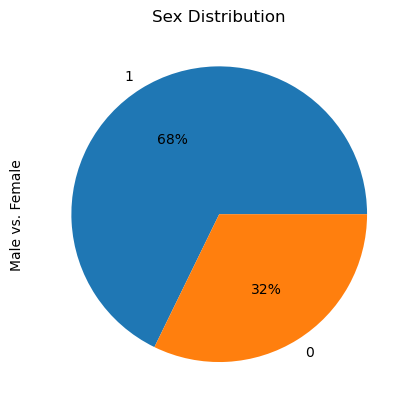

In [29]:
#Find the distribution of SEX, EXERCISE ANGINA, CHEST PAIN TYPE, EKG RESULTS, and HEART DISEASE using separete pie charts
#sex distribution pie
sex_distribution = heart_data["Sex"].value_counts()
Sex = ["Female 0","Male 1 "]
sex_distribution.plot(kind = "pie",ylabel="Male vs. Female", autopct = "%1.0f%%")
#display plot
plt.title("Sex Distribution")
print("Female(0) distribution is 32% while Male(1) is 68%")
plt.show


Exercise angina is present in 67% of Female individuals while only 33% present in Male individuals 


<function matplotlib.pyplot.show(close=None, block=None)>

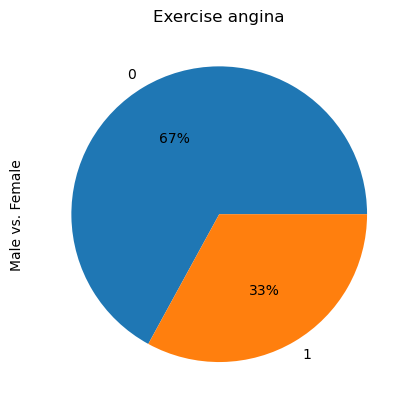

In [31]:
#exercise angina distribution pie
exercise_angina_distribution = heart_data["Exercise angina"].value_counts()
exercise_angina = ["0","1"]
exercise_angina_distribution.plot(kind = "pie",ylabel="Male vs. Female", autopct = "%1.0f%%")
#display plot
plt.title("Exercise angina")
print("Exercise angina is present in 67% of Female individuals while only 33% present in Male individuals ")
plt.show

According to the pie chart chest pain type 4 is the most evident followed by 3 then 2 then 1


<function matplotlib.pyplot.show(close=None, block=None)>

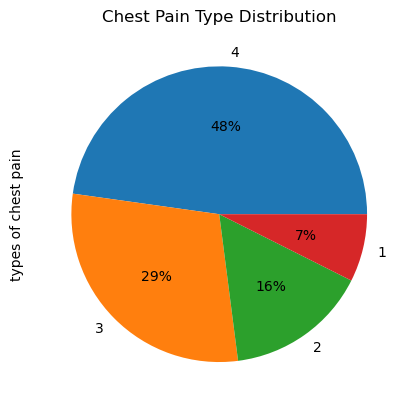

In [35]:
#chest pain distribution pie
chest_pain_distribution = heart_data["Chest pain type"].value_counts()
chest_pain = ["1","2","3","4"]
chest_pain_distribution.plot(kind = "pie",ylabel="types of chest pain", autopct = "%1.0f%%")
#display plot
plt.title("Chest Pain Type Distribution")
print("According to the pie chart chest pain type 4 is the most evident followed by 3 then 2 then 1")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

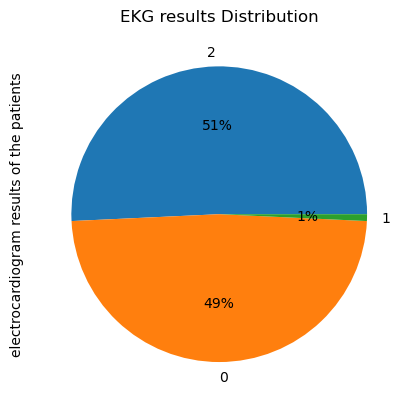

In [38]:
#ekg results distribution pie
ekg_results_distribution = heart_data["EKG results"].value_counts()
ekg_results = ["0","1","2"]
ekg_results_distribution.plot(kind = "pie",ylabel="electrocardiogram results of the patients", autopct = "%1.0f%%")
#display plot
plt.title("EKG results Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

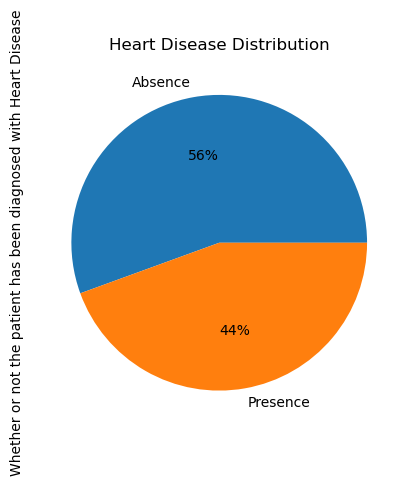

In [40]:
#heart disease distribution pie
heart_disease_distribution = heart_data["Heart Disease"].value_counts()
heart_disease_results = ["0","1","2"]
heart_disease_distribution.plot(kind = "pie",ylabel="Whether or not the patient has been diagnosed with Heart Disease", autopct = "%1.0f%%")
plt.title("Heart Disease Distribution")
plt.show

In [ ]:
#Using a scatterplot & Regression lines, Look at the correlations between 
#Age & Cholesterol
#Age & Max HR
#Age & BP
#Age & ST Depression

#save each plot as an image

In [ ]:
#Look at the relationship between Age, Sex, BP, Cholesterol, EKG results, Max HR, exercise angina, ST depression, number of vessels fluro
#and each of their relationships to the presence or absence of Heart Disease